# Diabetes prediction

[Data source](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

### Import libraries

In [169]:
!pip install seaborn
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [170]:
import pandas as pd
import tensorflow as tf
import keras as kr
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
print("Pandas v : " + pd.__version__)
print("Keras v :" +  kr.__version__)
print("tensorflow v : " + tf.__version__)

Pandas v : 2.2.0
Keras v :3.1.1
tensorflow v : 2.16.1


### Importing data and description

In [172]:
df_init = pd.read_csv("diabetes_prediction_dataset.csv", sep=",")

In [173]:
df_init

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [174]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [175]:
df_init.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [176]:
for col in df_init.columns :
  print(col + ":")
  print(df_init[col].unique())
  print("\n")

gender:
['Female' 'Male' 'Other']


age:
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]


hypertension:
[0 1]


heart_disease:
[1 0]


smoking_history:
['never' 'No Info' 'current' 'former' 'ever' 'not current']


bmi:
[25.19 27.32 23.45 ... 59.42 44.39 60.52]


HbA1c_level:
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]


blood_glucose_level:
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 3

In order to convert a dataframe to a tensor, we need to change all the values to numerical values.

But first, let's explore the data to ensure we use the appropriate conversion and normalization methods.

### Data exploration

In [177]:
df = df_init.copy()

In [178]:
def draw_pies(df, raw_pies , col_pies) :
  fig_pies , pie_axes = plt.subplots(raw_pies,col_pies,figsize=(8,4),layout="constrained")
  i = 0
  for ax1 in pie_axes :
    for ax2 in ax1 :
      proportion = df[df.columns[i]].value_counts()/df.shape[0]


      uniques = df[df.columns[i]].unique()
      uniques.sort()
      labels = []
      for label in  uniques :
        if label == 0  : labels.append("no")
        elif label == 1  : labels.append("yes")
        elif label == 0.5 : labels.append("average")
        elif label == 0.2 : labels.append("")
        elif label == 0.4 : labels.append("")
        elif label == 0.6 : labels.append("average +")
        elif label == 0.8 : labels.append("average ++")
        else : labels.append(label)


      ax2.pie(proportion.sort_index(),labels=labels,autopct="%.0f%%")
      ax2.set_title(df.columns[i])

      i += 1

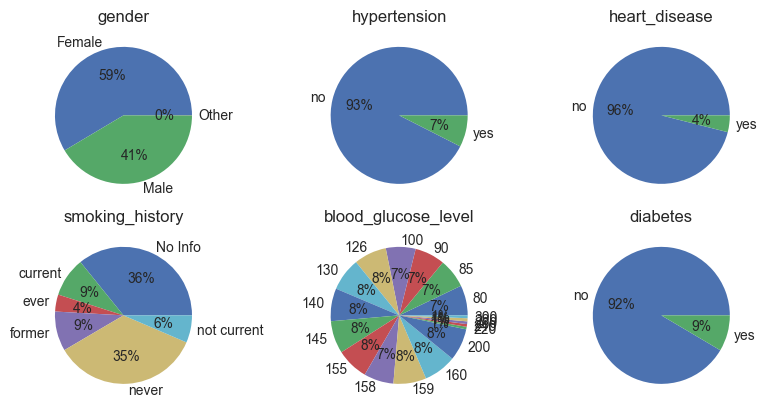

In [179]:
plt.style.use("seaborn-v0_8")
draw_pies(df[["gender","hypertension","heart_disease","smoking_history","blood_glucose_level","diabetes"]],2,3)

In [180]:
from seaborn import pairplot

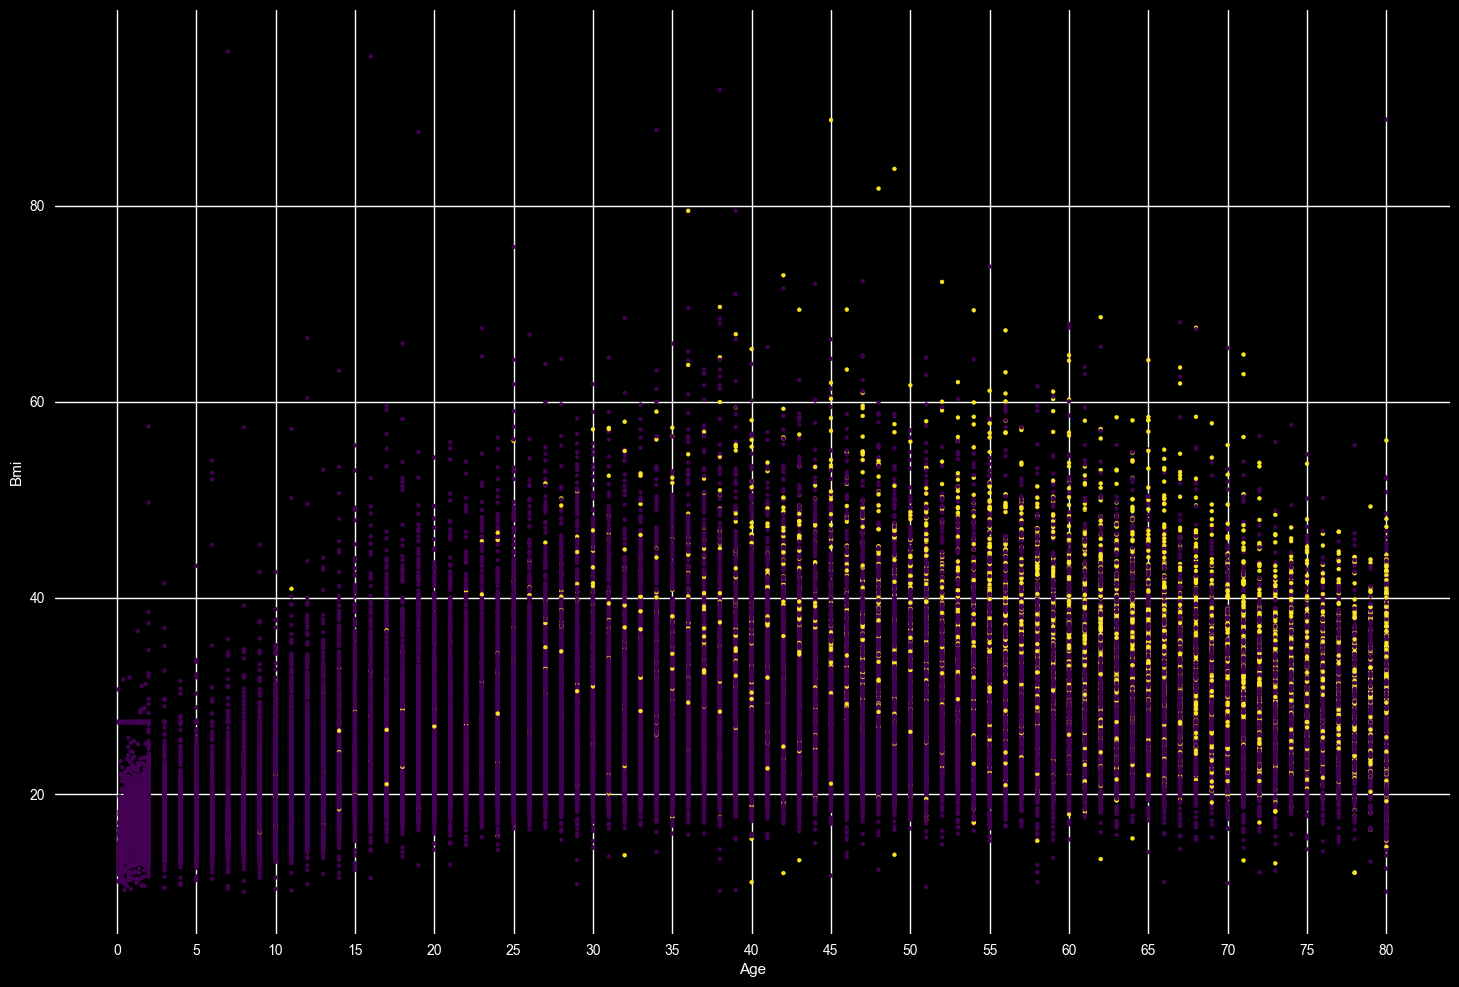

In [181]:
from numpy import arange
plt.style.use("dark_background")
plt.figure(figsize=(18,12))
plt.scatter(df.age,df.bmi,c=df.diabetes,s=8,cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.xticks(arange(0, 85, step=5))
plt.show()

BMI = height / weight² -> kg/m², makes sense only for people between the ages of 18 and 65.

For that reason, we're going to exclude people under the age of 18 and older than 65.

In [182]:
df = df_init.copy()
df = df[(df["age"] > 18) & (df["age"]<70)]
df.drop(['HbA1c_level', 'blood_glucose_level'], axis=1, inplace = True)
df = df[df["smoking_history"] != "No Info"]
smoking_map= {
    "never" : 0,
    "ever" : 1 ,
    "former" : 2,
    "not current" : 3,
    "current" : 4
}
df.smoking_history = df.smoking_history.map(smoking_map)
df.gender.replace("Other",pd.NA,inplace=True)
pd.get_dummies(df, columns = ['gender'],dtype=int)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\3863670969.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gender.replace("Other",pd.NA,inplace=True)


,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Female,gender_Male
2,28.0,0,0,0,27.32,0,0,1
3,36.0,0,0,4,23.45,0,1,0
5,20.0,0,0,0,27.32,0,1,0
6,44.0,0,0,0,19.31,1,1,0
8,42.0,0,0,0,33.64,0,0,1
...,...,...,...,...,...,...,...,...
99992,26.0,0,0,0,34.34,0,1,0
99993,40.0,0,0,0,40.69,0,1,0
99997,66.0,0,0,2,27.83,0,0,1
99998,24.0,0,0,0,35.42,0,1,0


In [183]:
df = df_init.copy()

In [184]:
df = df[(df["age"] > 18) & (df["age"]<70)]

We're also going to exclude people with an aberrant BMI, higher than 40. Obesity has dangerous consequences for people's health, more than diabetes. This is why we're going to exclude people with a BMI higher than 50, which looks like aberrant values, especially if we look at the numbers in this dataset

In [185]:
df = df[df.bmi < 50]

We're going to exclude all people who didn't inform about their smoking habits.

In [186]:
df = df[df["smoking_history"] != "No Info"]

After that, we're going to replot what we plotted before.

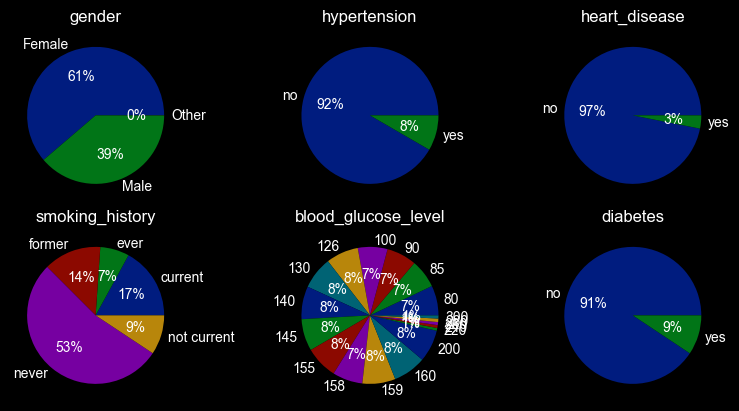

In [187]:
plt.style.use("seaborn-v0_8-dark-palette")
draw_pies(df[["gender","hypertension","heart_disease","smoking_history","blood_glucose_level","diabetes"]],2,3)

We don't have a significant impact in proportion after cleaning the data.

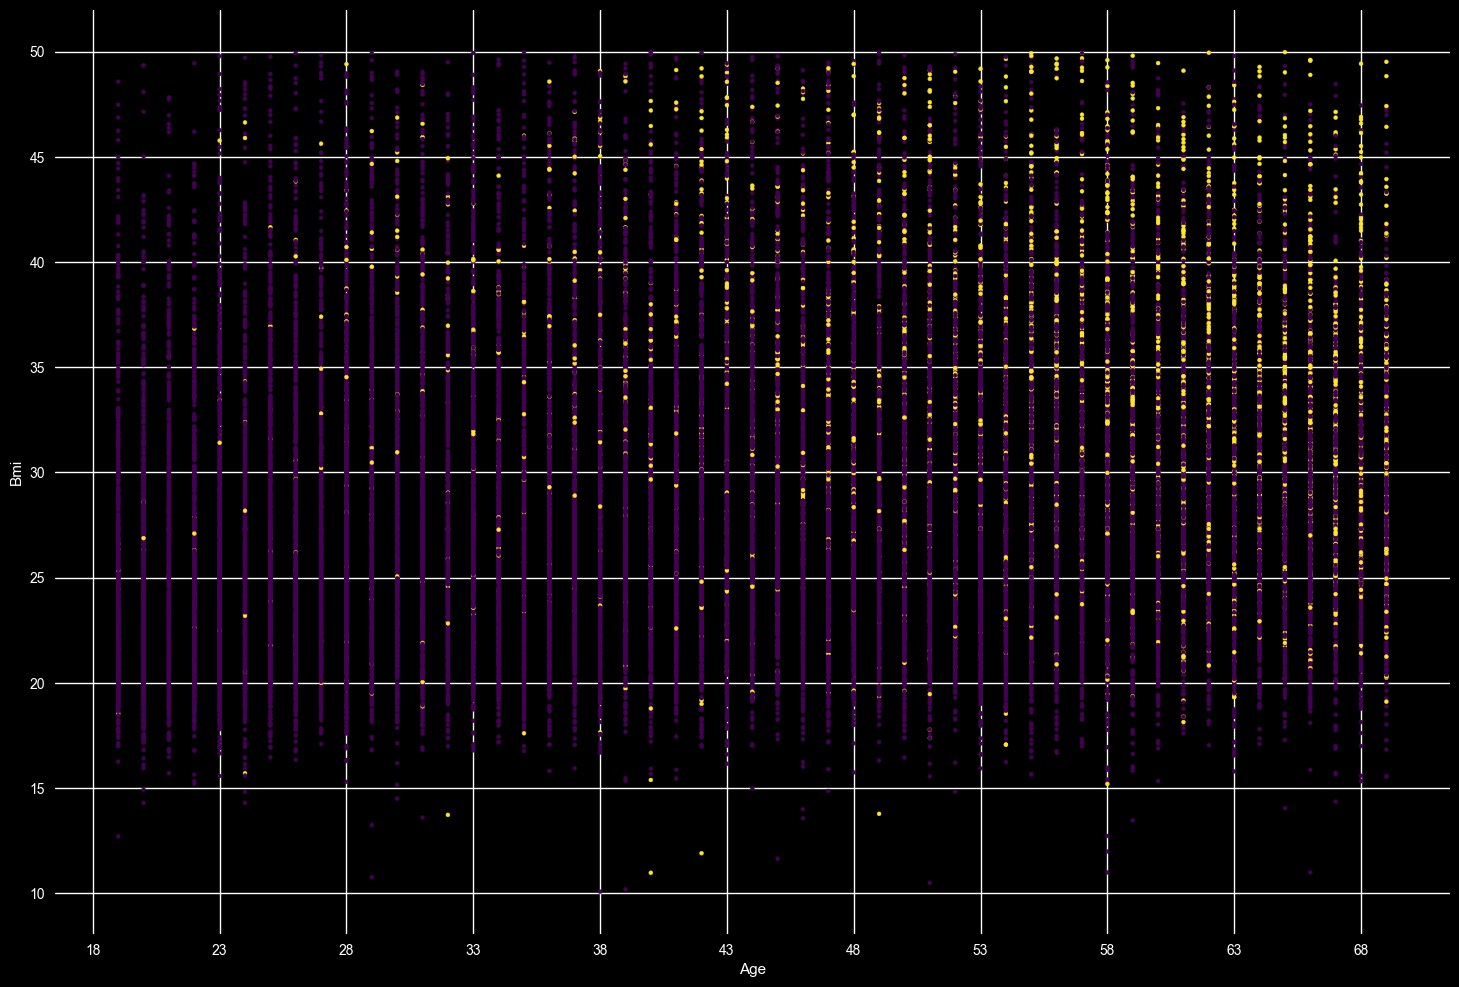

In [188]:
plt.style.use("dark_background")
plt.figure(figsize=(18,12))
plt.scatter(df.age,df.bmi,c=df.diabetes,s=8,cmap="viridis")
plt.xlabel("Age")
plt.ylabel("Bmi")
plt.xticks(arange(18, 70, step=5))

plt.show()

The goal of this work is to develop a model that can predict diabetes from common values known by people. The values of glucose and Hb1c are crucial in defining diabetes; therefore, we're going to exclude these variables.

In [189]:
df.drop(['HbA1c_level', 'blood_glucose_level'], axis=1, inplace = True)

In [190]:
df["age"].unique().shape[0]

51

### Histogram plot

<Axes: ylabel='Frequency'>

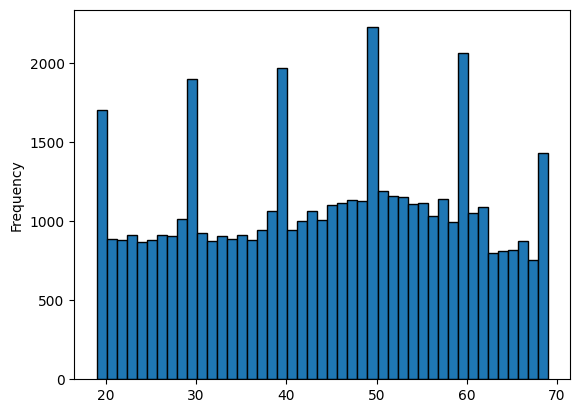

In [191]:
plt.style.use("default")
df["age"].plot.hist(bins=45,edgecolor="black")

We can observe exaggerated frequencies for 20, 30, 40, 50, and 60. This indicates that when the data were collected, most of them were rounded. Therefore, we're going to group them

We're going to obtain this kind of distribution by grouping the data

<Axes: ylabel='Frequency'>

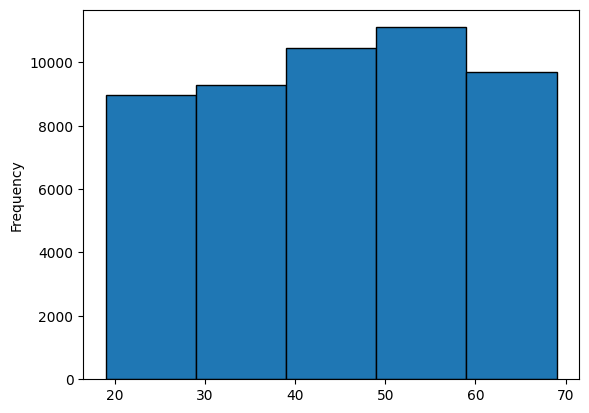

In [192]:
df["age"].plot.hist(bins=5,edgecolor="black")

In [193]:
def age_map(age):
  age = int(age)
  if age >= 18 and age<=28 :
    return 1
  elif age >= 29 and age<=38 :
    return 2
  elif age >= 39 and age<=48 :
    return 3
  elif age >= 49 and age<=58 :
    return 4
  elif age >= 59 and age<=69 :
    return 5

In [194]:
df["age"] = df["age"].map(lambda x: age_map(x))

<Axes: ylabel='Frequency'>

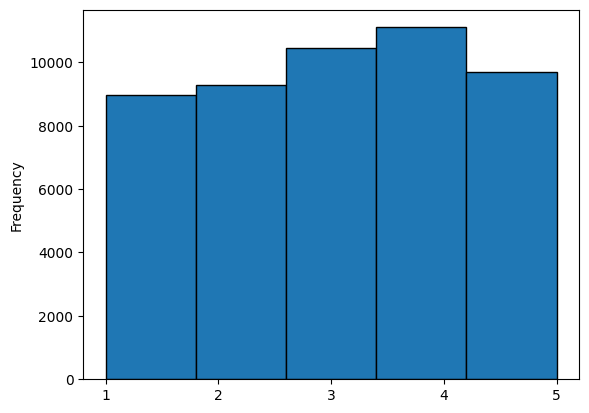

In [195]:
df["age"].plot.hist(bins=5,edgecolor="black",xticks=arange(1, 6, step=1))



---

<Axes: ylabel='Frequency'>

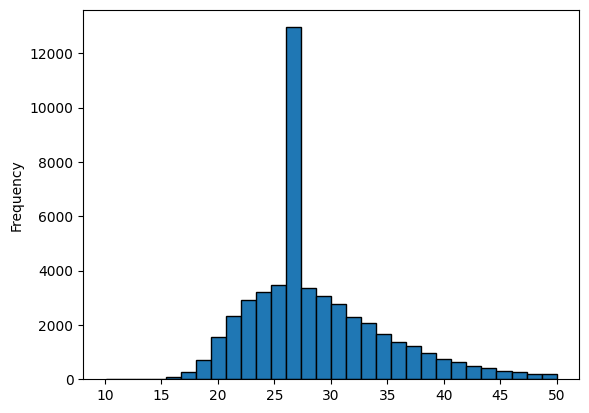

In [196]:
df.bmi.plot.hist(bins=30,edgecolor="black")

In [197]:
smoking_map= {
    "never" : 0,
    "ever" : 1 ,
    "former" : 2,
    "not current" : 3,
    "current" : 4
}
df.smoking_history = df.smoking_history.map(smoking_map)

<Axes: >

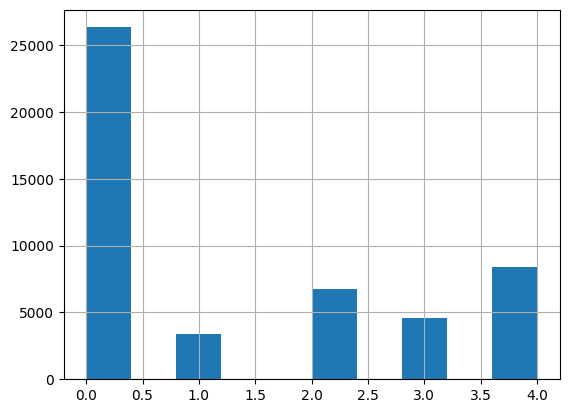

In [198]:
df.smoking_history.hist()

In [199]:
pd.NA

<NA>

In [200]:
df.gender.replace("Other",pd.NA,inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\3977960623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gender.replace("Other",pd.NA,inplace=True)


In [201]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,diabetes
2,Male,1,0,0,0,27.32,0
3,Female,2,0,0,4,23.45,0
5,Female,1,0,0,0,27.32,0
6,Female,3,0,0,0,19.31,1
8,Male,3,0,0,0,33.64,0
...,...,...,...,...,...,...,...
99992,Female,1,0,0,0,34.34,0
99993,Female,3,0,0,0,40.69,0
99997,Male,5,0,0,2,27.83,0
99998,Female,1,0,0,0,35.42,0


In [202]:
df.isnull().sum()

gender             8
age                0
hypertension       0
heart_disease      0
smoking_history    0
bmi                0
diabetes           0
dtype: int64

In [203]:
df.shape[0]

49501

In [204]:
df.dropna(inplace=True)

In [205]:
df.shape[0] - 49501

-8

In [206]:
df.isnull().sum()

gender             0
age                0
hypertension       0
heart_disease      0
smoking_history    0
bmi                0
diabetes           0
dtype: int64

In [207]:
pd.get_dummies(df, columns = ['gender'],dtype=int)

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Female,gender_Male
2,1,0,0,0,27.32,0,0,1
3,2,0,0,4,23.45,0,1,0
5,1,0,0,0,27.32,0,1,0
6,3,0,0,0,19.31,1,1,0
8,3,0,0,0,33.64,0,0,1
...,...,...,...,...,...,...,...,...
99992,1,0,0,0,34.34,0,1,0
99993,3,0,0,0,40.69,0,1,0
99997,5,0,0,2,27.83,0,0,1
99998,1,0,0,0,35.42,0,1,0


In [208]:
df = pd.get_dummies(df, columns = ['gender'],dtype=int)

<Axes: >

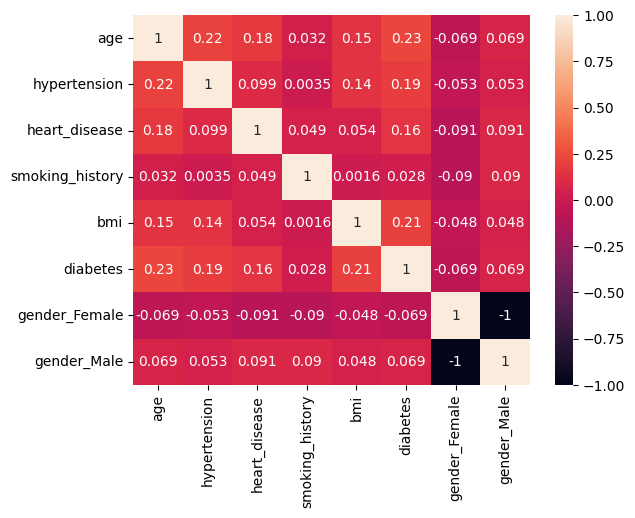

In [209]:
from seaborn import heatmap
heatmap(df.corr(),annot=True)

In [210]:
from sklearn.metrics import matthews_corrcoef
print("CORRELATION :")
print("hypertension - heart_disease = " + str(matthews_corrcoef(df['hypertension'], df["heart_disease"])))
print("hypertension - diabetes = " + str(matthews_corrcoef(df['hypertension'], df["diabetes"])))
print("heart_disease - diabetes = " + str(matthews_corrcoef(df['hypertension'], df["heart_disease"])))

CORRELATION :
hypertension - heart_disease = 0.09897054156632777
hypertension - diabetes = 0.18825436524860018
heart_disease - diabetes = 0.09897054156632777


In [211]:
df.describe()

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Female,gender_Male
count,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000
mean,3.066110,0.083527,0.030994,1.301133,28.764147,0.093367,0.612794,0.387206
std,1.383503,0.276680,0.173304,1.575685,5.881856,0.290949,0.487116,0.487116
min,1.000000,0.000000,0.000000,0.000000,10.080000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,25.200000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,27.320000,0.000000,1.000000,0.000000
75%,4.000000,0.000000,0.000000,3.000000,31.590000,0.000000,1.000000,1.000000
max,5.000000,1.000000,1.000000,4.000000,49.990000,1.000000,1.000000,1.000000


In [212]:
df.dtypes

age                  int64
hypertension         int64
heart_disease        int64
smoking_history      int64
bmi                float64
diabetes             int64
gender_Female        int32
gender_Male          int32
dtype: object

Normalisation

In [213]:
df.bmi = (df.bmi-df.bmi.min())/(df.bmi.max()-df.bmi.min())
df.age = (df.bmi-df.bmi.min())/(df.bmi.max()-df.bmi.min())
df.smoking_history = (df.bmi-df.bmi.min())/(df.bmi.max()-df.bmi.min())

In [214]:
df = df.sample(frac=1)

In [215]:
df

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Female,gender_Male
72244,0.338762,0,0,0.338762,0.338762,0,1,0
73324,0.539965,0,0,0.539965,0.539965,0,1,0
89003,0.332999,0,0,0.332999,0.332999,0,1,0
38263,0.462541,0,0,0.462541,0.462541,0,0,1
25857,0.676522,0,0,0.676522,0.676522,0,0,1
...,...,...,...,...,...,...,...,...
65154,0.340015,0,0,0.340015,0.340015,0,1,0
9103,0.356552,0,0,0.356552,0.356552,0,1,0
19918,0.348785,0,0,0.348785,0.348785,0,0,1
21265,0.556001,0,0,0.556001,0.556001,1,0,1


In [216]:
df.describe()

,age,hypertension,heart_disease,smoking_history,bmi,diabetes,gender_Female,gender_Male
count,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000,49493.000000
mean,0.468157,0.083527,0.030994,0.468157,0.468157,0.093367,0.612794,0.387206
std,0.147378,0.276680,0.173304,0.147378,0.147378,0.290949,0.487116,0.487116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378852,0.000000,0.000000,0.378852,0.378852,0.000000,0.000000,0.000000
50%,0.431972,0.000000,0.000000,0.431972,0.431972,0.000000,1.000000,0.000000
75%,0.538963,0.000000,0.000000,0.538963,0.538963,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
dfy = df.diabetes
dfy

72244    0
73324    0
89003    0
38263    0
25857    0
        ..
65154    0
9103     0
19918    0
21265    1
78864    0
Name: diabetes, Length: 49493, dtype: int64

In [218]:
dfx = df.drop(columns="diabetes")
dfx

,age,hypertension,heart_disease,smoking_history,bmi,gender_Female,gender_Male
72244,0.338762,0,0,0.338762,0.338762,1,0
73324,0.539965,0,0,0.539965,0.539965,1,0
89003,0.332999,0,0,0.332999,0.332999,1,0
38263,0.462541,0,0,0.462541,0.462541,0,1
25857,0.676522,0,0,0.676522,0.676522,0,1
...,...,...,...,...,...,...,...
65154,0.340015,0,0,0.340015,0.340015,1,0
9103,0.356552,0,0,0.356552,0.356552,1,0
19918,0.348785,0,0,0.348785,0.348785,0,1
21265,0.556001,0,0,0.556001,0.556001,0,1


In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)

In [220]:
print('X_train', x_train.shape)
print('y_train', y_train.shape)
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (39594, 7)
y_train (39594,)
X_test (9899, 7)
y_test (9899,)


In [221]:
y_test.value_counts()/y_test.shape[0]

diabetes
0    0.906657
1    0.093343
Name: count, dtype: float64

In [222]:
y_train.value_counts()/y_train.shape[0]

diabetes
0    0.906627
1    0.093373
Name: count, dtype: float64

## Model prediction

In [223]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD

# Evaluation des scores
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import RocCurveDisplay as plt_roc_curve

In [224]:
score_summary = pd.DataFrame(columns=["Method","f1","recall","precision","accuracy"])

In [225]:
def evaluate() :
  print("f1 score entrainement : ",round(f1_score(y_train, y_train_predict, average='weighted'),3))
  print("f1 score test : ",round(f1_score(y_test, y_test_predict, average='weighted'),3))
  print("recall_score entrainement : ",round(recall_score(y_train, y_train_predict, average='weighted'),3))
  print("recall_score test : ",round(recall_score(y_test, y_test_predict, average='weighted'),3))
  print("precision entrainement : ",round(precision_score(y_train, y_train_predict, average='weighted'),3))
  print("precision test : ",round(precision_score(y_test, y_test_predict, average='weighted'),3))
  print("justesse entrainement : ",round(accuracy_score(y_train, y_train_predict),3))
  print("justesse test : ",round(accuracy_score(y_test, y_test_predict),3))


  fig, axes = plt.subplots(2,2,figsize=(14,8),layout="constrained") # On initialise notre figure

# On plot la matrice de confusion de l'entrainement
  cf_matrix = CM(y_train, y_train_predict )
  cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["no diabetic","diabetic"])
  cm_plt.plot(ax=axes[0][0])
  axes[0][0].set_title("Train result")

# On plot la matrice de confusion du test
  cf_matrix = CM(y_test, y_test_predict)
  cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["no diabetic","diabetic"])
  cm_plt.plot(ax=axes[0][1])
  axes[0][1].set_title("test result")

# On plot la matrice de confusion de l'entrainement
  cf_matrix = CM(y_train, y_train_predict,normalize="true" )
  cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["no diabetic","diabetic"])
  cm_plt.plot(ax=axes[1][0])
  axes[1][0].set_title("Train result %")

# On plot la matrice de confusion du test
  cf_matrix = CM(y_test, y_test_predict, normalize="true" )
  cm_plt = CMD(confusion_matrix=cf_matrix,  display_labels=["no diabetic","diabetic"])
  cm_plt.plot(ax=axes[1][1])
  axes[1][1].set_title("Test result %")

In [226]:
def f(x) :
  if x[0] > x[1]:
    return 0
  else :
    return 1

### Machine Learning

##### Random forrest

f1 score entrainement :  0.919
f1 score test :  0.869
recall_score entrainement :  0.933
recall_score test :  0.891
precision entrainement :  0.93
precision test :  0.856
justesse entrainement :  0.933
justesse test :  0.891


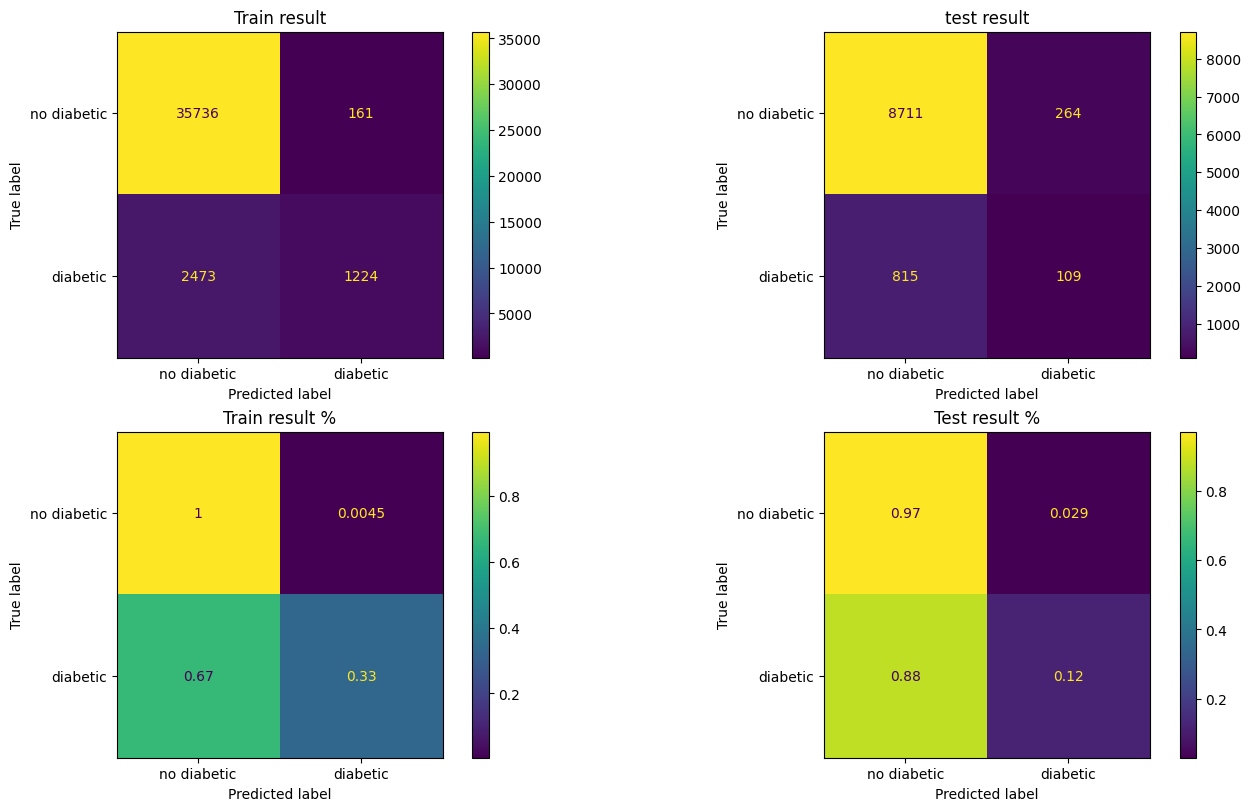

In [227]:
from sklearn.ensemble import RandomForestClassifier
random_forrest = RandomForestClassifier()
random_forrest.fit(x_train,y_train)
y_test_predict = random_forrest.predict(x_test)
y_train_predict = random_forrest.predict(x_train)
evaluate()

In [228]:
new_score = pd.DataFrame({
  "Method" : "Random forrest basic data",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary =pd.concat([score_summary,new_score],ignore_index = True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\3093716297.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_summary =pd.concat([score_summary,new_score],ignore_index = True)


##### NN

Turn target to multiclass

In [229]:
dfy = pd.get_dummies(df, columns = ['diabetes'],dtype=int)[['diabetes_0',"diabetes_1"]]
dfx = df.drop(columns=["diabetes"])
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)
dfy

,diabetes_0,diabetes_1
72244,1,0
73324,1,0
89003,1,0
38263,1,0
25857,1,0
...,...,...
65154,1,0
9103,1,0
19918,1,0
21265,0,1


Data convertion

In [230]:
input_data = tf.convert_to_tensor(x_train)
input_test = tf.convert_to_tensor(x_test)
output_data = tf.convert_to_tensor(y_train)
output_test = tf.convert_to_tensor(y_test)

In [231]:
NN = kr.Sequential(
    [
        kr.Input(shape=(7,)),
        kr.layers.Dense(64, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(64, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(64, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(2,activation="sigmoid")
    ]
)

In [232]:
NN.compile(
    loss=kr.losses.CategoricalCrossentropy(),
    optimizer= kr.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [233]:
NN.fit(
    x=input_data,
    y=output_data,
    validation_split = 0.2,
    batch_size=32,
    epochs=3)

Epoch 1/3
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8980 - loss: 0.3020 - val_accuracy: 0.9093 - val_loss: 0.2757
Epoch 2/3
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9048 - loss: 0.2740 - val_accuracy: 0.9097 - val_loss: 0.2740
Epoch 3/3
990/990 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9050 - loss: 0.2809 - val_accuracy: 0.9083 - val_loss: 0.2737


In [234]:
y_train_predict = NN.predict(input_data)
y_train_predict = pd.DataFrame(y_train_predict)
y_train_predict = y_train_predict.apply(f, axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.apply(f, axis=1)

y_test_predict = NN.predict(input_test)
y_test_predict = pd.DataFrame(y_test_predict)
y_test_predict = y_test_predict.apply(f, axis=1)


y_test= pd.DataFrame(y_test)
y_test = y_test.apply(f, axis=1)

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\1991617336.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] > x[1]:


310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


In [235]:
y_test_predict.value_counts()

0    9815
1      84
Name: count, dtype: int64

f1 score entrainement :  0.869
f1 score test :  0.868
recall_score entrainement :  0.906
recall_score test :  0.906
precision entrainement :  0.87
precision test :  0.866
justesse entrainement :  0.906
justesse test :  0.906


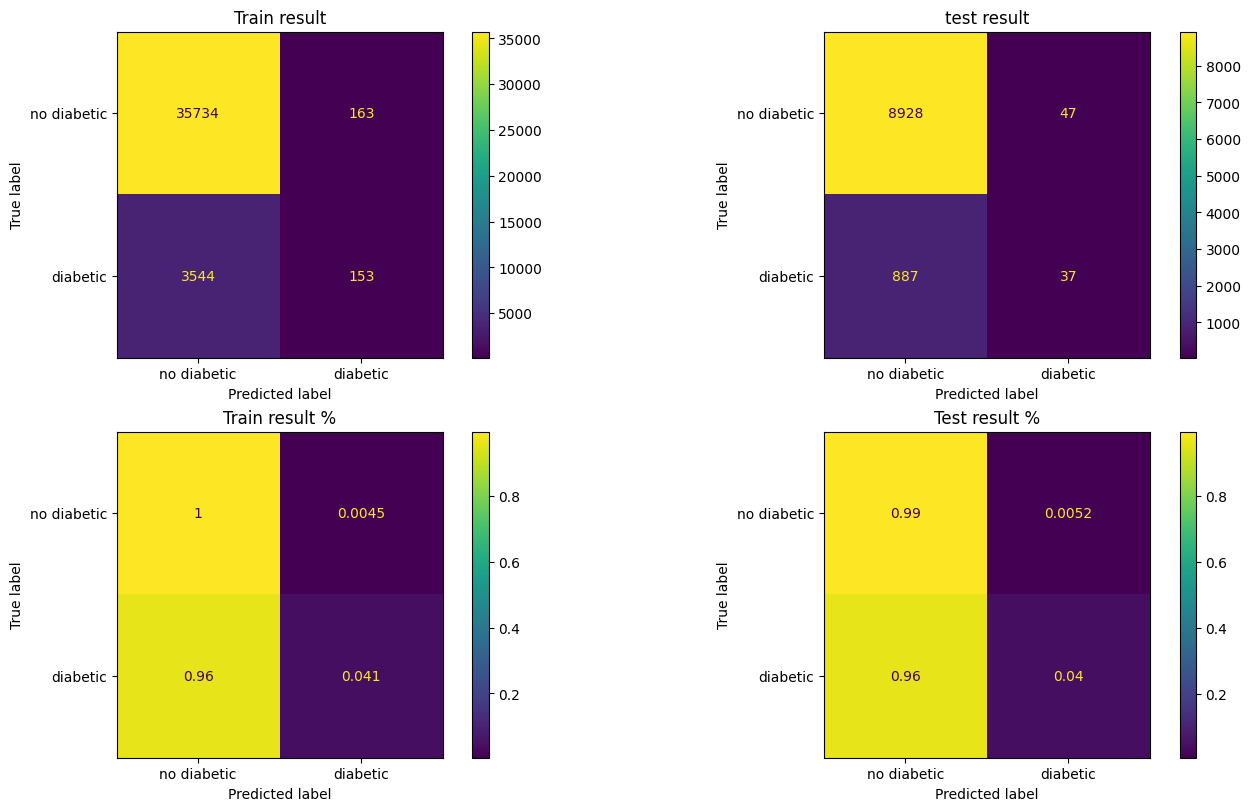

In [236]:
evaluate()

In [237]:
new_score = pd.DataFrame({
  "Method" : "NN basic data",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary =pd.concat([score_summary,new_score],ignore_index = True)

### Undersampling

In [238]:
df_under = pd.concat([df[df.diabetes == 1],df[df.diabetes == 0].sample(12000)])
df_under = df_under.sample(frac=1)
dfx = df_under.drop(columns="diabetes")
dfy = df_under.diabetes

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)

#### Machine Learning

##### Random forrest

f1 score entrainement :  0.857
f1 score test :  0.709
recall_score entrainement :  0.863
recall_score test :  0.721
precision entrainement :  0.861
precision test :  0.703
justesse entrainement :  0.863
justesse test :  0.721


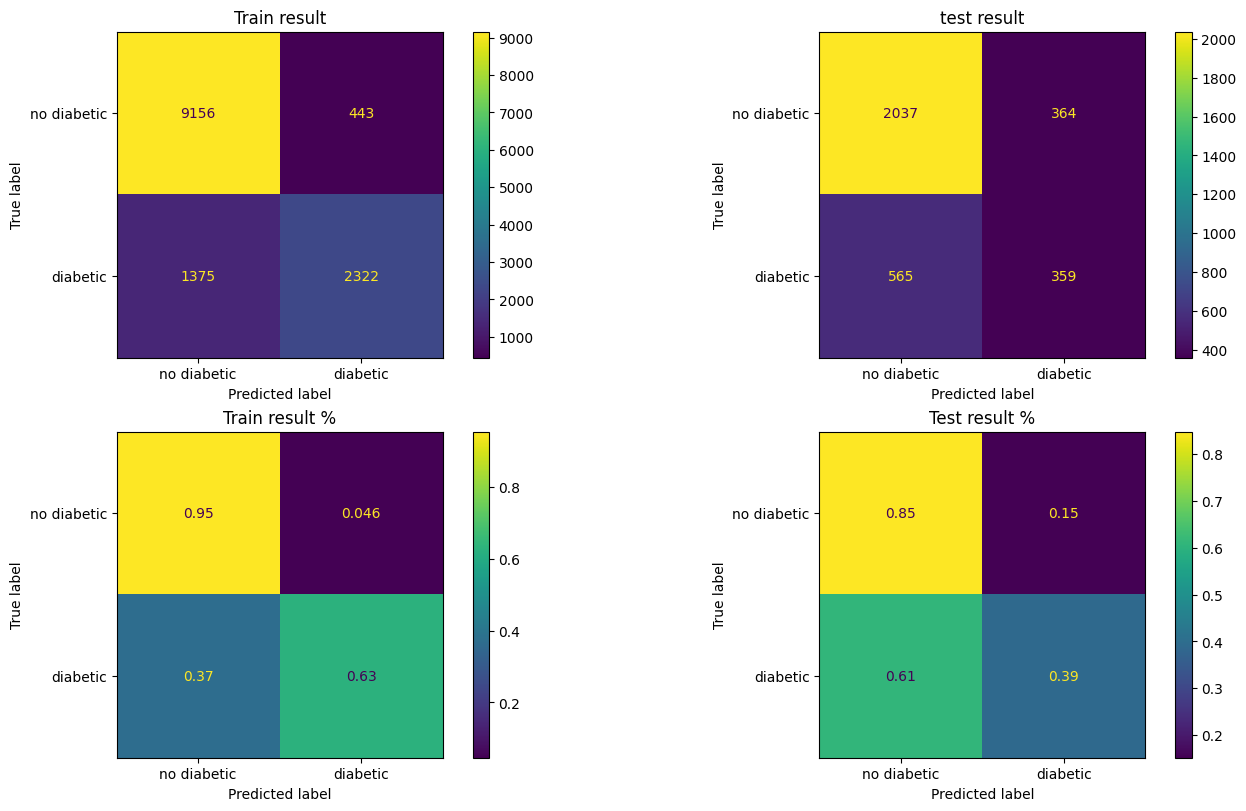

In [239]:
from sklearn.ensemble import RandomForestClassifier
random_forrest = RandomForestClassifier()
random_forrest.fit(x_train,y_train)
y_test_predict = random_forrest.predict(x_test)
y_train_predict = random_forrest.predict(x_train)
evaluate()

In [240]:
new_score = pd.DataFrame({
  "Method" : "Random forrest undersampling",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary =pd.concat([score_summary,new_score],ignore_index = True)

##### NN

Turn target to multiclass

In [241]:
dfy = pd.get_dummies(df_under, columns = ['diabetes'],dtype=int)[['diabetes_0',"diabetes_1"]]
dfx = df_under.drop(columns=["diabetes"])
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)
dfy

,diabetes_0,diabetes_1
17952,1,0
15420,1,0
73929,0,1
29584,0,1
42650,1,0
...,...,...
64,1,0
74556,0,1
98975,1,0
20844,1,0


Data convertion

In [242]:
input_data = tf.convert_to_tensor(x_train)
input_test = tf.convert_to_tensor(x_test)
output_data = tf.convert_to_tensor(y_train)
output_test = tf.convert_to_tensor(y_test)

In [243]:
NN = kr.Sequential(
    [
        kr.Input(shape=(7,)),
        kr.layers.Dense(7, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(7, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(2,activation="sigmoid")
    ]
)

In [244]:
NN.compile(
    #loss="BinaryCrossentropy",
    loss=kr.losses.CategoricalCrossentropy(),
    optimizer= kr.optimizers.Adam(),
    metrics=["accuracy"]
)

In [245]:
NN.fit(
    x=input_data,
    y=output_data,
    validation_split = 0.2,
    batch_size=16,
    epochs=4)

Epoch 1/4
665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7182 - loss: 0.5870 - val_accuracy: 0.7515 - val_loss: 0.5329
Epoch 2/4
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7566 - loss: 0.5261 - val_accuracy: 0.7586 - val_loss: 0.5108
Epoch 3/4
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7575 - loss: 0.5117 - val_accuracy: 0.7590 - val_loss: 0.5065
Epoch 4/4
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7595 - loss: 0.5039 - val_accuracy: 0.7586 - val_loss: 0.5050


In [246]:
y_train_predict = NN.predict(input_data)
y_train_predict = pd.DataFrame(y_train_predict)
y_train_predict = y_train_predict.apply(f, axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.apply(f, axis=1)

y_test_predict = NN.predict(input_test)
y_test_predict = pd.DataFrame(y_test_predict)
y_test_predict = y_test_predict.apply(f, axis=1)


y_test= pd.DataFrame(y_test)
y_test = y_test.apply(f, axis=1)

416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\1991617336.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] > x[1]:


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


f1 score entrainement :  0.732
f1 score test :  0.716
recall_score entrainement :  0.757
recall_score test :  0.746
precision entrainement :  0.736
precision test :  0.72
justesse entrainement :  0.757
justesse test :  0.746


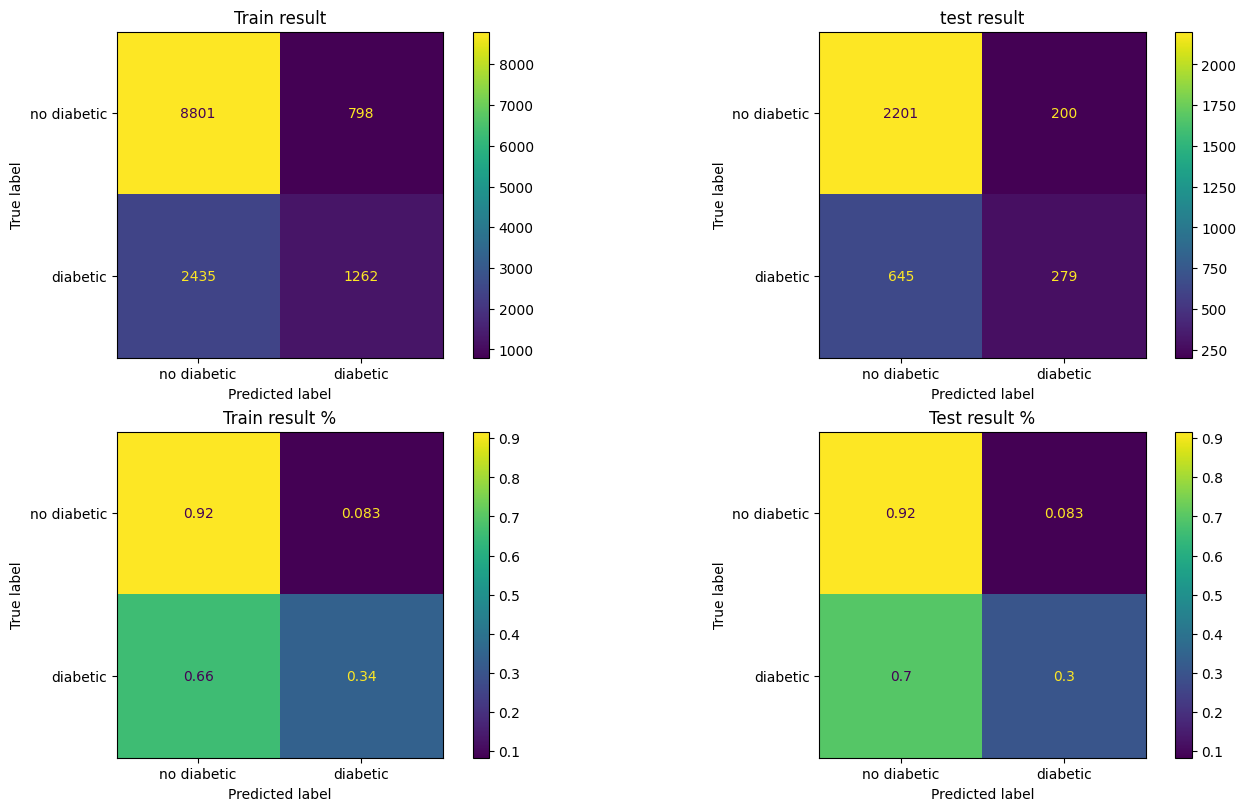

In [247]:
evaluate()

In [248]:
new_score = pd.DataFrame({
  "Method" : "NN undersampling",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary =pd.concat([score_summary,new_score],ignore_index = True)

### oversampling

In [249]:
dfy = df.diabetes
dfx = df.drop(columns="diabetes")
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)

In [251]:
!pip install imblearn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/257.7 kB 487.6 kB/s eta 0:00:01
   ----------------- ---------------------- 112.6/257.7 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 163.8/257.7 k

In [252]:
#Smote
from imblearn.over_sampling import SMOTE as sm
smote = sm(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_test, y_test = smote.fit_resample(x_test, y_test)

#### Machine Learning

##### Random forrest

f1 score entrainement :  0.901
f1 score test :  0.715
recall_score entrainement :  0.902
recall_score test :  0.722
precision entrainement :  0.906
precision test :  0.748
justesse entrainement :  0.902
justesse test :  0.722


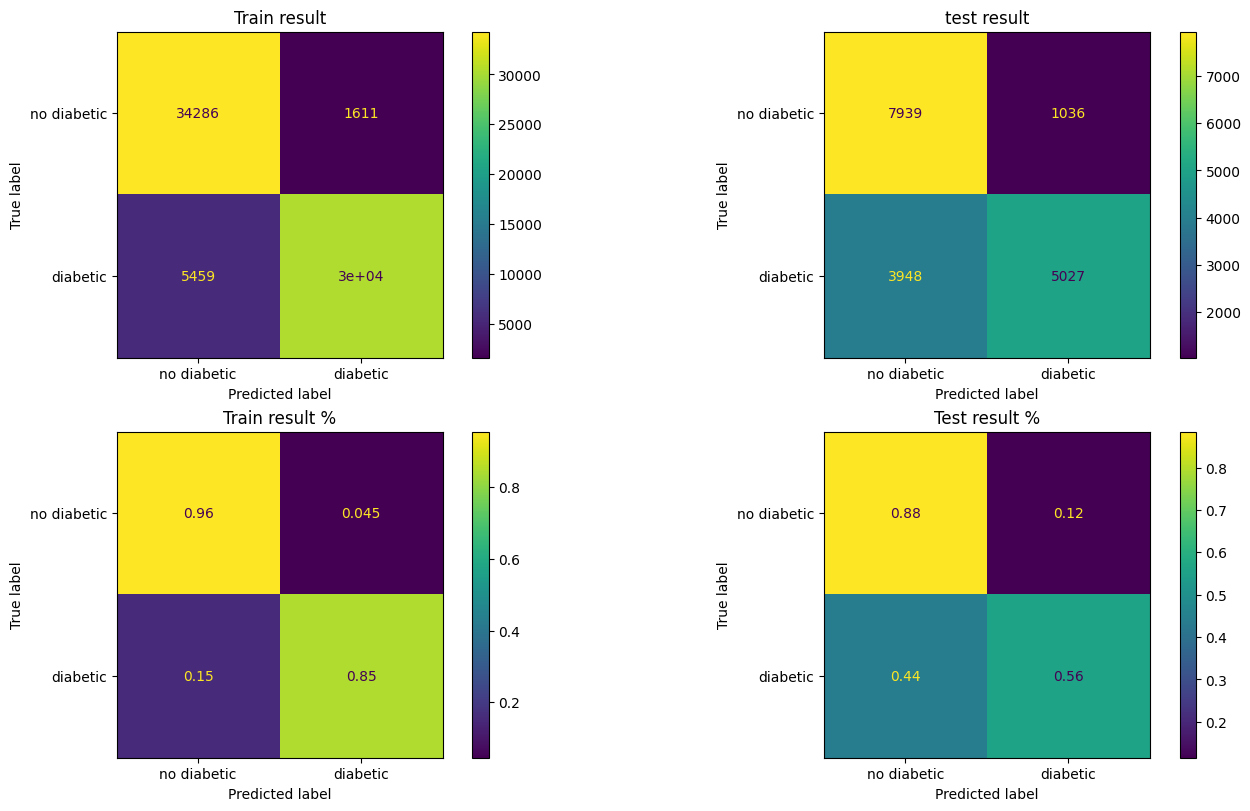

In [253]:
from sklearn.ensemble import RandomForestClassifier
random_forrest = RandomForestClassifier()
random_forrest.fit(x_train,y_train)
y_test_predict = random_forrest.predict(x_test)
y_train_predict = random_forrest.predict(x_train)
evaluate()

In [254]:
new_score = pd.DataFrame({
  "Method" : "Random forrest oversampling",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary =pd.concat([score_summary,new_score],ignore_index = True)

##### NN

Turn target to multiclass

In [255]:
y_train = pd.DataFrame(y_train)
y_train = pd.get_dummies(y_train,columns=["diabetes"],dtype=int)
y_train

,diabetes_0,diabetes_1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
71789,0,1
71790,0,1
71791,0,1
71792,0,1


In [256]:
y_test = pd.DataFrame(y_test)
y_test = pd.get_dummies(y_test,columns=["diabetes"],dtype=int)
y_test

,diabetes_0,diabetes_1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
17945,0,1
17946,0,1
17947,0,1
17948,0,1


Data convertion

In [257]:
input_data = tf.convert_to_tensor(x_train)
input_test = tf.convert_to_tensor(x_test)
output_data = tf.convert_to_tensor(y_train)
output_test = tf.convert_to_tensor(y_test)

In [259]:
NN = kr.Sequential(
    [
        kr.Input(shape=(7,)),
        kr.layers.Dense(64, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(64, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(32, activation="relu",kernel_initializer='HeNormal'),
        kr.layers.Dense(2,activation="sigmoid")
    ]
)

In [260]:
NN.compile(
    #loss="BinaryCrossentropy",
    loss=kr.losses.CategoricalCrossentropy(),
    optimizer= kr.optimizers.Adam(),
    metrics=["accuracy"]
)

In [261]:
NN.fit(
    x=input_data,
    y=output_data,
    validation_split = 0.2,
    batch_size=16,
    epochs=4)

Epoch 1/4
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7003 - loss: 0.5832 - val_accuracy: 0.5394 - val_loss: 0.7501
Epoch 2/4
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7072 - loss: 0.5723 - val_accuracy: 0.4761 - val_loss: 0.8835
Epoch 3/4
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7085 - loss: 0.5704 - val_accuracy: 0.4787 - val_loss: 0.8572
Epoch 4/4
3590/3590 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7089 - loss: 0.5714 - val_accuracy: 0.5134 - val_loss: 0.8406


In [262]:
y_train

,diabetes_0,diabetes_1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
71789,0,1
71790,0,1
71791,0,1
71792,0,1


In [263]:
y_train_predict = NN.predict(input_data)
y_train_predict = pd.DataFrame(y_train_predict)
y_train_predict = y_train_predict.apply(f, axis=1)

y_train = pd.DataFrame(y_train)
y_train = y_train.apply(f, axis=1)

y_test_predict = NN.predict(input_test)
y_test_predict = pd.DataFrame(y_test_predict)
y_test_predict = y_test_predict.apply(f, axis=1)


y_test= pd.DataFrame(y_test)
y_test = y_test.apply(f, axis=1)

2244/2244 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step


C:\Users\KIIT\AppData\Local\Temp\ipykernel_10780\1991617336.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] > x[1]:


561/561 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step


f1 score entrainement :  0.663
f1 score test :  0.67
recall_score entrainement :  0.672
recall_score test :  0.677
precision entrainement :  0.692
precision test :  0.695
justesse entrainement :  0.672
justesse test :  0.677


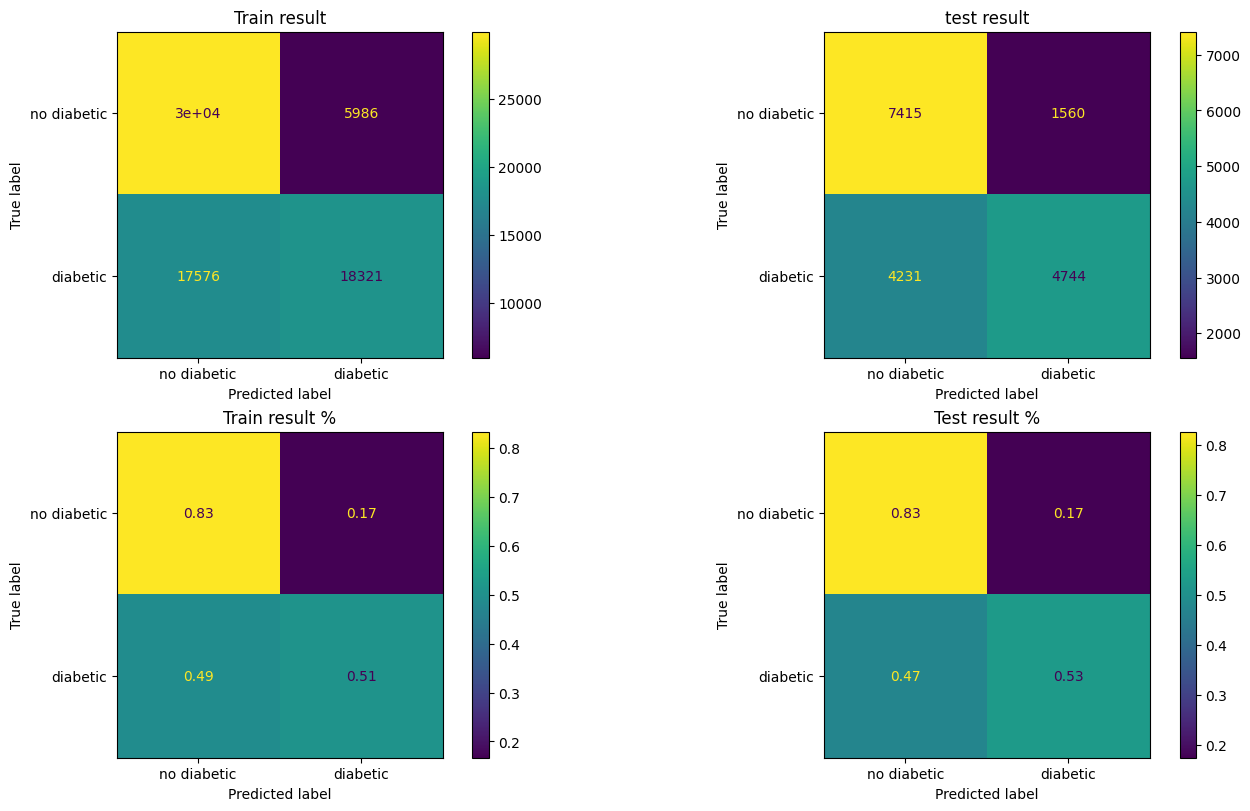

In [264]:
evaluate()

In [265]:
new_score = pd.DataFrame({
  "Method" : "NN undersampling",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
score_summary = pd.concat([score_summary,new_score],ignore_index = True)

In [266]:
score_summary

,Method,f1,recall,precision,accuracy
0,Random forrest basic data,0.869,0.891,0.856,0.891
1,NN basic data,0.868,0.906,0.866,0.906
2,Random forrest undersampling,0.709,0.721,0.703,0.721
3,NN undersampling,0.716,0.746,0.720,0.746
4,Random forrest oversampling,0.715,0.722,0.748,0.722
5,NN undersampling,0.670,0.677,0.695,0.677


### Baggin random forrest

In [267]:
import warnings
warnings.filterwarnings('ignore')

f1 score entrainement :  0.871
f1 score test :  0.816
recall_score entrainement :  0.849
recall_score test :  0.784
precision entrainement :  0.911
precision test :  0.861
justesse entrainement :  0.849
justesse test :  0.784


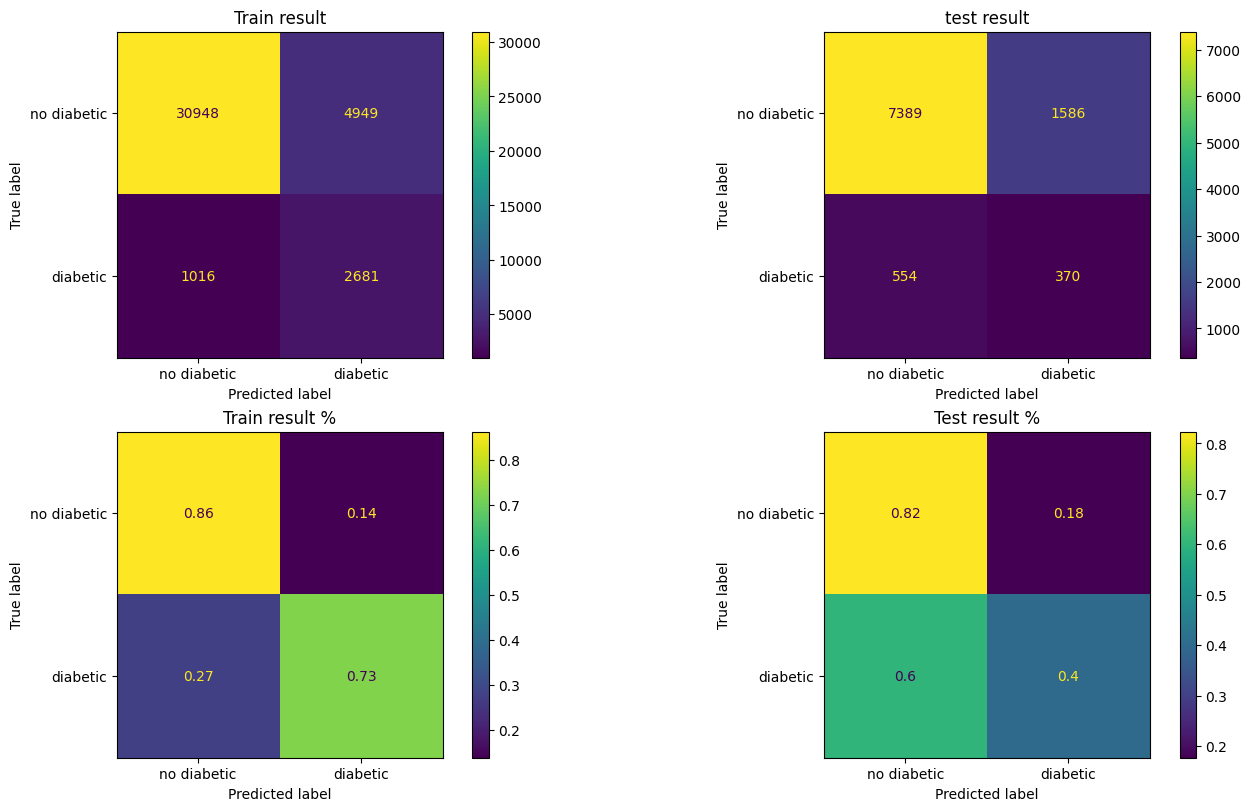

In [268]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(sampling_strategy=0.4,bootstrap=False,min_samples_split=2,n_estimators=100)
dfx = df.drop(columns="diabetes")
dfy = df.diabetes
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=0,stratify=dfy)
brf.fit(x_train,y_train)
y_test_predict = brf.predict(x_test)
y_train_predict = brf.predict(x_train)
evaluate()

In [269]:
new_score = pd.DataFrame({
  "Method" : "Balance random forrest",
  "f1" : round(f1_score(y_test, y_test_predict, average='weighted'),3),
  "recall" : round(recall_score(y_test, y_test_predict, average='weighted'),3),
  "precision" : round(precision_score(y_test, y_test_predict, average='weighted'),3),
  "accuracy" :round( accuracy_score(y_test, y_test_predict),3)
},index=[0])
pd.concat([score_summary,new_score],ignore_index = True)

,Method,f1,recall,precision,accuracy
0,Random forrest basic data,0.869,0.891,0.856,0.891
1,NN basic data,0.868,0.906,0.866,0.906
2,Random forrest undersampling,0.709,0.721,0.703,0.721
3,NN undersampling,0.716,0.746,0.720,0.746
4,Random forrest oversampling,0.715,0.722,0.748,0.722
5,NN undersampling,0.670,0.677,0.695,0.677
6,Balance random forrest,0.816,0.784,0.861,0.784


In [ ]:
score_summary

## Conclusion:

The primary objective of this work was to develop a model that predicts the likelihood of developing diabetes using readily available information such as height, weight, and medical history, without the need for blood glucose values, which are typically used to diagnose diabetes.

In our summary analysis, it is evident that the neural network outperforms other models in terms of accuracy and other evaluation metrics. However, due to the imbalance in the dataset, the model tends to achieve high scores by predicting non-diabetic cases predominantly. To address this issue, various methods for balancing the data and improving predictions were employed. Consequently, while the model's ability to predict diabetic cases improved, there was a trade-off in precision for non-diabetic cases.

Secondly, Random Forest outperforms Neural Network in predicting diabetic patients. This is attributed to Random Forest's preference for handling unbalanced datasets effectively. Utilizing a grid search is recommended for optimal model tuning.

While the model shows promise for prediction, it is not yet at a stage where it can be deployed effectively for real-world applications. Further refinement and validation are necessary to enhance its reliability and usefulness in practical scenarios.

This work represents an initial attempt at developing such a model, and ongoing efforts are underway to refine and improve its performance. Future modifications and enhancements will be explored to develop a more robust and reliable predictive tool.